Függvény a float ellenőrzéshez.

In [ ]:
# -*- coding: utf-8 -*-
from sklearn.metrics import mean_squared_error

def is_float(s): #számok kiszűrése
    try:
        float(s)
        return True
    except ValueError:
        return False


In [ ]:
print(is_float("alma"))
print(is_float("-3.9"))
for i in range(2,9):
  print(i,"páros" if i%2==0 else "páratlan")
for i in ["szilva", "5", "3.14", 3.14]:
  print(i,"float" if is_float(i) else "nem float")


False
True
2 páros
3 páratlan
4 páros
5 páratlan
6 páros
7 páratlan
8 páros
szilva nem float
5 float
3.14 float
3.14 float


Google drive kezeléséhez import és mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Adatok beolvasása, plusz paraméterek.

In [ ]:
HIST=10
COLS=3
adatok_nyers=[sor.strip().split(sep=";") for sor in open("/content/drive/My Drive/Classroom/Tibor Tajti/neural net application/BP_d.csv")]


In [ ]:
adatok_nyers[:5]

[['#datum', 'd_ta', 'd_tx', 'd_tn', 'd_rs', 'd_rf', 'd_ss', 'd_ssr'],
 ['1901-01-01', '-5.7', '-0.4', '-9.2', '1.9', '4', '', ''],
 ['1901-01-02', '-9.3', '-6.6', '-11.3', '0.0', '', '', ''],
 ['1901-01-03', '-9.1', '-6.6', '-10.8', '0.8', '4', '', ''],
 ['1901-01-04', '-11.0', '-9.8', '-12.4', '0.2', '4', '', '']]

Adatokból kiválasztjuk a felhasználandókat. (avg, max, min hőmérséklet)

In [ ]:
print( len(adatok_nyers), adatok_nyers[0])
adatok=[[float(adat) if is_float(adat) else adat  for adat in sor[1:COLS+1] ] for sor in adatok_nyers[1:]]
print( len(adatok), adatok[0])
print( min([min(sor) for sor in adatok]), max([max(sor) for sor in adatok]))

43831 ['#datum', 'd_ta', 'd_tx', 'd_tn', 'd_rs', 'd_rf', 'd_ss', 'd_ssr']
43830 [-5.7, -0.4, -9.2]
-23.4 40.1


Az adatokból kiválasztunk tanulási és tesztelési mintahalmazt.

In [ ]:
train=adatok[:20000]
test=adatok[20000:25000]


In [ ]:
train[:5], test[:5]

([[-5.7, -0.4, -9.2],
  [-9.3, -6.6, -11.3],
  [-9.1, -6.6, -10.8],
  [-11.0, -9.8, -12.4],
  [-11.1, -9.0, -15.5]],
 [[14.1, 20.2, 10.1],
  [15.6, 20.0, 11.2],
  [12.4, 16.4, 10.5],
  [14.2, 17.5, 10.4],
  [13.3, 15.1, 12.3]])

Az adatsorokból idősoros mintákat állítunk elő.

In [ ]:
import numpy as np
train_x=(np.array([ train[i:i+HIST] for i in range(len(train)-HIST)])-8)/40 # első sortól az ötödikig
train_y=(np.array([ train[i+HIST] for i in range(len(train)-HIST)])-8)/40
#train_x=(np.array([ train[i:i+HIST] for i in range(0,19990)])+35)/40 # első sortól az ötödikig
#train_y=(np.array([ train[i+HIST] for i in range(0,19990)])+35)/40
test_x=(np.array([ test[i:i+HIST] for i in range(len(test)-HIST)])-8)/40 # első sortól az ötödikig
test_y=(np.array([ test[i+HIST] for i in range(len(test)-HIST)])-8)/40

print(train_x.shape, train_y.shape)
print(train_x[0])
print(train_y[0])


(19990, 10, 3) (19990, 3)
[[-0.3425 -0.21   -0.43  ]
 [-0.4325 -0.365  -0.4825]
 [-0.4275 -0.365  -0.47  ]
 [-0.475  -0.445  -0.51  ]
 [-0.4775 -0.425  -0.5875]
 [-0.4    -0.35   -0.545 ]
 [-0.3375 -0.275  -0.3725]
 [-0.45   -0.3475 -0.51  ]
 [-0.5025 -0.425  -0.5975]
 [-0.505  -0.445  -0.6225]]
[-0.4325 -0.39   -0.5375]


Egyszerű futtatás 50 leckével.

In [ ]:
print('train with tensorflow')
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(HIST,COLS)),
  tf.keras.layers.Dense(100, activation='tanh'),
  tf.keras.layers.Dense(50, activation='tanh'),
  tf.keras.layers.Dense(COLS, activation='tanh')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

mselst=[]
for _ in range(50):
  model.fit(train_x, train_y, epochs=1)
  y=model.predict(test_x)
  print('prediction MSE:', mean_squared_error(test_y, y))
  print('dummy MSE:', mean_squared_error(test_y[HIST:], test_y[HIST-1:-1]))
  mselst.append(mean_squared_error(test_y, y))


train with tensorflow
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.0032148935356100874
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.003314590220797215
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.003144797307870145
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.0032004898506326177
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.003160851568023268
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.0034476772269238505
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.0032072491526189233
dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 1ms/step
prediction MSE: 0.0032685670930369284
dummy MSE: 0.

Ugyanaz még egyszer 10 db tanulóval.

In [ ]:
print('train with tensorflow')
import tensorflow as tf
mselstlst=[]
for m in range(10):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(HIST,COLS)),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(COLS, activation='tanh')
  ])

  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

  mselst=[]
  for epoch in range(50):
    model.fit(train_x, train_y, epochs=1)
    y=model.predict(test_x)
    print(m, epoch, 'prediction MSE:', mean_squared_error(test_y, y))
    print(m, epoch, 'dummy MSE:', mean_squared_error(test_y[HIST:], test_y[HIST-1:-1]))
    mselst.append(mean_squared_error(test_y, y))

  mselstlst.append(mselst)


train with tensorflow
156/156 [==============================] - 0s 2ms/step
0 0 prediction MSE: 0.0033908436801931446
0 0 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/step
0 1 prediction MSE: 0.003596868929844521
0 1 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/step
0 2 prediction MSE: 0.0031573953013442953
0 2 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/step
0 3 prediction MSE: 0.00350071811277171
0 3 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/step
0 4 prediction MSE: 0.003291387395544146
0 4 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/step
0 5 prediction MSE: 0.003304513754705748
0 5 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/step
0 6 prediction MSE: 0.003391066456796849
0 6 dummy MSE: 0.003883875502008048
156/156 [==============================] - 0s 2ms/ste

In [ ]:
print(mselst)
print(mselstlst)
res=np.array(mselstlst)
print(res.shape)
print(np.mean(res))
print(np.mean(res, axis=1))
print(np.mean(res, axis=0))


[0.0033942251333765575, 0.0038008693873222894, 0.003312532954400069, 0.0034764654226441226, 0.0035626908536774246, 0.003249697705361669, 0.0032291960825599985, 0.003214918881091869, 0.003323107621193393, 0.003246497711868818, 0.0032493451526025706, 0.0031679001804056275, 0.0032214040305089168, 0.003441908226032582, 0.003323927129752442, 0.0031447778843275783, 0.0031852832138660856, 0.003206880638348603, 0.003284501625275306, 0.0031743976207896357, 0.0032611676352676607, 0.0031859232046109135, 0.003307040219064071, 0.0031906242496684604, 0.003143617614580961, 0.0031382537909004564, 0.003161314292331513, 0.0030748857918210695, 0.0031384574179159964, 0.003121922592603765, 0.003111403201146059, 0.003190137374303252, 0.003078010805610791, 0.0033737172747224237, 0.0030897746184555853, 0.0030929695914990274, 0.0031059090818525057, 0.0030941155069327017, 0.0032670469056018682, 0.003303022308599893, 0.003111998219648944, 0.003125787106828031, 0.0031937914972970396, 0.0032420325108353265, 0.0032

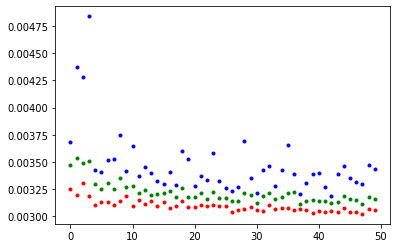

In [ ]:
from matplotlib import pyplot as plt
plt.plot(np.mean(res, axis=0),"g.")
plt.plot(np.min(res, axis=0),"r.")
plt.plot(np.max(res, axis=0),"b.")
plt.show()

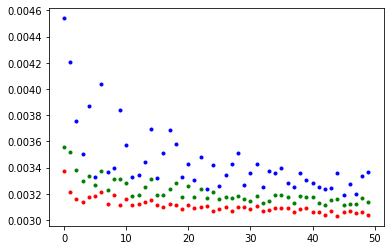

In [ ]:
from matplotlib import pyplot as plt
plt.plot(np.mean(res, axis=0),"g.")
plt.plot(np.min(res, axis=0),"r.")
plt.plot(np.max(res, axis=0),"b.")
plt.show()

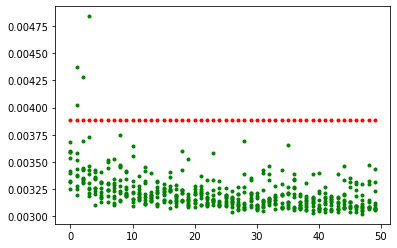

In [ ]:
for i in range(len(res)):
  plt.plot(res[i],"g.")
dummy=mean_squared_error(test_y[HIST:], test_y[HIST-1:-1])
plt.plot([dummy for _ in res[0]],"r.")
plt.show()

In [ ]:
train_x2=train_x.reshape((train_x.shape[0], train_x.shape[1]*train_x.shape[2]))
test_x2=test_x.reshape((test_x.shape[0], test_x.shape[1]*test_x.shape[2]))
print(train_x2.shape, test_x2.shape)


(19990, 30) (4990, 30)


In [ ]:
print('train with own simple MLP')

import math, random, time

# available activation functions
def activation_tanh(x):     return math.tanh(x)     # (-1..1)
def dactivation_tanh(x):    return 1.0 - x**2
def activation_sigmoid(x):  return 1.0/(1.0 + math.exp(-x))   # (0..1)
def dactivation_sigmoid(x): return x*(1.0-x)

#acti, dacti = activation_sigmoid, dactivation_sigmoid
acti, dacti = activation_tanh, dactivation_tanh

B = 1
#nn = [2+B, 4, 3, 3]
nn = [len(train_x2[0])+B, 20, 10, len(train_y[0])]
wl=[ [ [random.random()*0.4-0.2 for _ in range(nn[l])] for _ in range(nn[l+1])] for l in range(len(nn)-1)] 
#wl = [ numpy.random.random((nn[l+1], nn[l]))*0.8-0.4 for l in range(len(nn)-1) ]
#wl = [numpy.linspace(-1,1,nn[l]*nn[l+1]).reshape((nn[l+1], nn[l])) for l in range(len(nn)-1)]
#          3
#[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#                         8
#[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
epoch = 0
sumerr = len(train_x2)
# training
t00=time.time()
while sumerr/len(train_x2)/nn[-1]>=0.0001 and epoch<20:
    sumerr = 0.0
    epoch += 1
    t0=time.time()
    #for inp, out in random.sample(samples, len(samples)):
    for inp, out in zip(train_x2, train_y):
        nl = [ list(inp) + [1.0]*B ]
        for l in range(len(nn)-1):
            nl.append([acti(sum([nl[l][i] * wl[l][j][i] for i in range(nn[l])])) for j in range(nn[l+1])])
            
        error = [out[j] - nl[-1][j] for j in range(nn[-1])]
        delta = [None for _ in range(len(nn)-1)]
        for l in reversed(range(len(nn)-1)):
            if l == len(nn)-2:
                delta[l] = [error[j] * dacti(nl[-1][j]) for j in range(nn[-1])]
            else:
                delta[l] = [sum([delta[l+1][j] * wl[l+1][j][i] for j in range(nn[l+2])])*dacti(nl[l+1][i]) for i in range(nn[l+1])]
            
            for i in range(nn[l]):
                for j in range(nn[l+1]):
                    wl[l][j][i] += 0.01 * delta[l][j] * nl[l][i]

        sumerr += sum( [error[j]**2 for j in range(nn[-1])])
    print (epoch,round(sumerr/len(train_x2)/nn[-1],3), round(time.time()-t0,3))
print (epoch,round(sumerr/len(train_x2)/nn[-1],3), round(time.time()-t00,3))

#testing
y2=[]
#for inp, out in random.sample(samples, len(samples)):
for inp in test_x2:
    nl = [ list(inp) + [1.0]*B ]
    for l in range(len(nn)-1):
        nl.append([acti(sum([nl[l][i] * wl[l][j][i] for i in range(nn[l])])) for j in range(nn[l+1])])
        
    y2.append(nl[-1])
y2=np.array(y2)
print('prediction MSE:', mean_squared_error(test_y, y2))
print('dummy MSE:', mean_squared_error(test_y[1:], test_y[:-1]))




train with own simple MLP
1 0.006 18.687
2 0.004 21.996
3 0.004 18.712
4 0.004 18.753
5 0.004 18.655
6 0.004 18.641
7 0.003 18.693
8 0.003 18.762
9 0.003 18.754
10 0.003 18.789
11 0.003 19.172
12 0.003 18.743
13 0.003 20.749
14 0.003 18.519
15 0.003 18.608
16 0.003 18.583
17 0.003 18.582
18 0.003 18.68
19 0.003 18.652
20 0.003 18.682
20 0.003 379.436
prediction MSE: 0.003498989085390193
dummy MSE: 0.0038834861695730767


In [ ]:
a=[11,12,13,14,15]
b=[21,22,23,24,25]
[ (a,b) for a,b in zip(a,b) ]

[(11, 21), (12, 22), (13, 23), (14, 24), (15, 25)]

In [ ]:
x=['x1','x2','x3','x4','x5']
y=['y1','y2','y3','y4','y5']
[ (_x,_y) for _x,_y in zip(x,y) ]

[('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4'), ('x5', 'y5')]

In [ ]:
print('train with own simple MLP vectorized')
import random, time
def activation_tanh(x):     return np.tanh(x)     # (-1..1)
def dactivation_tanh(x):    return 1.0 - x**2
def activation_sigmoid(x):  return 1.0/(1.0 + np.exp(-x))   # (0..1)
def dactivation_sigmoid(x): return x*(1.0-x)

acti, dacti = activation_tanh, dactivation_tanh

B = 1
nn = [len(train_x2[0])+B, 100, 50, len(train_y[0])]
wl = [ np.random.random((nn[l+1], nn[l]))*0.2-0.1 for l in range(len(nn)-1)] 
#wl = [numpy.linspace(-1,1,nn[l]*nn[l+1]).reshape((nn[l+1], nn[l])) for l in range(len(nn)-1)]
delta = [np.zeros((nn[l+1])) for l in range(len(nn)-1)]

epoch = 0
sumerr = len(train_x2)
t00=time.time()
while sumerr/len(train_x2)/nn[-1]>=0.0001 and epoch<20:
    sumerr = 0.0
    epoch += 1
    t0=time.time()
    #for inp, out in random.sample(samples, len(samples)):
    #for inp, out in zip(train_x2, train_y):
    for inp, out in random.sample([(a,b) for a,b in zip(train_x2, train_y)],len(train_x2)):
        nl = [ np.array(list(inp) + [1.0]*B) ]
        for l in range(len(nn)-1):
            nl.append(acti(np.dot(wl[l],nl[l])))
        error = out - nl[-1]
        #delta = [None for _ in range(len(nn)-1)]
        for l in reversed(range(len(nn)-1)):
            if l == len(nn)-2:
                #delta[l] = error*dacti(nl[-1])
                delta[l][:] = error*dacti(nl[-1])
            else:
                #delta[l] = numpy.dot(delta[l+1],wl[l+1])*dacti(nl[l+1])
                np.dot(delta[l+1],wl[l+1], out=delta[l])
                delta[l] *= dacti(nl[l+1])
            
            wl[l] += 0.01 * delta[l].reshape((nn[l+1],1))*nl[l].reshape((1,nn[l]))

        sumerr += sum(error**2)
    print (epoch,round(sumerr/len(train_x2)/nn[-1],3), round(time.time()-t0,3))
print (epoch,round(sumerr/len(train_x2)/nn[-1],3), round(time.time()-t00,3))

sumerr = 0.0
y2=[]
for inp in test_x2:
    nl = [ np.array(list(inp) + [1.0]*B) ]
    for l in range(len(nn)-1):
        nl.append(acti(np.dot(wl[l],nl[l])))
    y2.append(nl[-1])
y2=np.array(y2)
print('prediction MSE:', mean_squared_error(test_y, y2))
print('dummy MSE:', mean_squared_error(test_y[1:], test_y[:-1]))


train with own simple MLP vectorized
1 0.006 1.907
2 0.004 1.84
3 0.004 2.275
4 0.004 1.83
5 0.004 1.826
6 0.003 1.871
7 0.003 1.905
8 0.003 1.836
9 0.003 1.834
10 0.003 1.796
11 0.003 1.822
12 0.003 1.902
13 0.003 1.846
14 0.003 1.835
15 0.003 1.838
16 0.003 1.816
17 0.003 1.883
18 0.003 1.822
19 0.003 1.836
20 0.003 1.831
20 0.003 37.365
prediction MSE: 0.0033660413475829543
dummy MSE: 0.0038834861695730763


In [ ]:
print('train with own simple MLP vectorized + momentum')
import random, time

def activation_tanh(x):     return np.tanh(x)     # (-1..1)
def dactivation_tanh(x):    return 1.0 - x**2
def activation_sigmoid(x):  return 1.0/(1.0 + np.exp(-x))   # (0..1)
def dactivation_sigmoid(x): return x*(1.0-x)

acti, dacti = activation_tanh, dactivation_tanh

B=1
nn = [len(train_x2[0])+B, 100, 50, len(train_y[0])]
wl = [ np.random.random((nn[l+1], nn[l]))*0.2-0.1 for l in range(len(nn)-1)] 
#wl = [numpy.linspace(-1,1,nn[l]*nn[l+1]).reshape((nn[l+1], nn[l])) for l in range(len(nn)-1)]
delta = [np.zeros((nn[l+1])) for l in range(len(nn)-1)]
cl = [np.zeros_like(_w) for _w in wl]
epoch = 0
sumerr = len(train_x2)
t00=time.time()
while sumerr/len(train_x2)>=0.0001 and epoch<20:
    sumerr = 0.0
    epoch += 1
    t0=time.time()
    #for inp, out in random.sample(samples, len(samples)):
    #for inp, out in zip(train_x2, train_y):
    for inp, out in random.sample([(a,b) for a,b in zip(train_x2, train_y)],len(train_x2)):
        nl = [ np.array(list(inp) + [1.0]*B) ]
        for l in range(len(nn)-1):
            nl.append(acti(np.dot(wl[l],nl[l])))
        error = out - nl[-1]
        #delta = [None for _ in range(len(nn)-1)]
        for l in reversed(range(len(nn)-1)):
            if l == len(nn)-2:
                #delta[l] = error*dacti(nl[-1])
                delta[l][:] = error*dacti(nl[-1])
            else:
                #delta[l] = numpy.dot(delta[l+1],wl[l+1])*dacti(nl[l+1])
                np.dot(delta[l+1],wl[l+1], out=delta[l])
                delta[l] *= dacti(nl[l+1])
            
            wl[l] += 0.2*cl[l]
            cl[l][:]=0.01 * delta[l].reshape((nn[l+1],1))*nl[l].reshape((1,nn[l]))
            wl[l] += 0.8*cl[l]

        sumerr += sum( [error[j]**2 for j in range(nn[-1])])
    print (epoch,round(sumerr/len(train_x2)/nn[-1],3), round(time.time()-t0,3))
print (epoch,round(sumerr/len(train_x2)/nn[-1],3), round(time.time()-t00,3))

sumerr = 0.0
y2=[]
#for inp, out in random.sample(samples, len(samples)):
for inp in test_x2:
    nl = [ np.array(list(inp) + [1.0]*B) ]
    for l in range(len(nn)-1):
        nl.append(acti(np.dot(wl[l],nl[l])))
    y2.append(nl[-1])
y2=np.array(y2)
print('prediction MSE:', mean_squared_error(test_y, y2))
print('stupid MSE:', mean_squared_error(test_y[1:], test_y[:-1]))


train with own simple MLP vectorized + momentum
1 0.006 2.712
2 0.004 2.42
3 0.004 2.464
4 0.004 2.407
5 0.004 2.501
6 0.003 2.385
7 0.003 2.411
8 0.003 2.373
9 0.003 2.406
10 0.003 2.449
11 0.003 2.411
12 0.003 2.407
13 0.003 2.424
14 0.003 2.438
15 0.003 2.457
16 0.003 2.391
17 0.003 2.396
18 0.003 2.492
19 0.003 2.373
20 0.003 2.401
20 0.003 48.738
prediction MSE: 0.003114472911873856
stupid MSE: 0.0038834861695730763


In [ ]:
for a, b in zip(test_y, y):
  for _a, _b in zip(a*70-35, b*70-35):
    print(round(_a,2), round(_b,2), end="; ")
  print()

9.3 12.88; 14.3 17.97; 6.6 7.68; 
10.1 10.14; 15.0 14.13; 7.0 5.54; 
9.2 10.86; 9.8 15.05; 8.0 6.51; 
10.6 9.46; 14.8 11.92; 9.1 6.36; 
8.4 10.92; 10.2 14.56; 7.5 7.33; 
8.5 8.8; 13.0 11.29; 2.7 5.56; 
9.4 9.33; 14.2 13.03; 5.5 4.64; 
11.8 9.9; 15.5 13.89; 7.0 5.38; 
10.9 11.82; 13.1 15.79; 9.2 7.42; 
10.4 10.33; 11.7 13.07; 6.5 6.89; 
6.8 10.11; 11.6 12.53; 5.5 6.73; 
9.7 6.61; 12.0 9.01; 5.7 2.98; 
9.4 10.1; 16.2 12.88; 6.0 6.53; 
9.7 9.61; 15.2 13.6; 6.5 4.97; 
4.9 9.89; 8.7 13.51; 3.6 5.88; 
4.2 4.86; 7.8 7.29; -0.6 1.26; 
2.3 5.15; 5.3 8.17; -0.2 0.94; 
4.8 2.99; 8.1 5.42; 1.7 -0.94; 
5.1 5.49; 6.5 8.19; 2.3 1.79; 
6.9 5.21; 8.0 7.09; 5.1 2.06; 
7.5 6.79; 8.3 8.69; 5.8 4.08; 
9.9 7.14; 10.6 8.8; 8.0 4.38; 
10.4 9.18; 11.1 11.34; 9.4 6.49; 
11.2 9.15; 13.2 10.86; 9.5 6.83; 
10.7 9.76; 13.5 11.67; 9.0 7.44; 
10.8 9.26; 13.8 11.12; 9.4 6.81; 
9.6 9.63; 12.4 11.75; 5.7 7.12; 
9.5 8.85; 12.1 10.82; 7.6 5.86; 
9.2 8.91; 10.1 10.82; 8.0 6.21; 
8.6 8.66; 9.5 9.82; 7.8 6.43; 
7.1 8.13; 8.7

In [ ]:
import numpy as np
import random
def activation_sigmoid(x):  return 1.0/(1.0 + np.exp(-x))   # (0..1)
def dactivation_sigmoid(x): return x*(1.0-x)

def f(x):
    for _x in x:
      y=activation_sigmoid(_x)

x=[random.random()*10-5 for _ in range(100)]
g=np.arange(-16,17)
gg=1.0/(1.0 + np.exp(-g)).astype(np.float64)
gd=gg[1:]-gg[:-1]

def activation_sigmoid_pcw(x):
  b=np.floor(x).astype(np.int32)
  d=x-b
  return gg[b+17]*d+gg[b+16]*(1-d)

def activation_sigmoid_pcw2(x):
  b=np.floor(x).astype(np.int32)
  d=x-b
  return gg[b+16]+gd[b+17]*(1.0-d)

def f2(x):
    for _x in x:
      y=activation_sigmoid_pcw(_x)

In [ ]:
x=np.linspace(-5,5,1000)


In [ ]:
timeit activation_sigmoid(x)


The slowest run took 42.79 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 24.5 µs per loop


In [ ]:
timeit activation_sigmoid_pcw(x)

The slowest run took 6.22 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 22.7 µs per loop


In [ ]:
g=np.arange(-16,17)
gg=1.0/(1.0 + np.exp(-g))
x=2.5
b=np.floor(x).astype(np.int32)
print(b)
d=x-b
r=gg[b+17]*d+gg[b+16]*(1-d)
print(r, 1.0/(1.0 + np.exp(-int(x))), 1.0/(1.0 + np.exp(-x)))

2
0.9166856024001578 0.8807970779778823 0.9241418199787566


In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

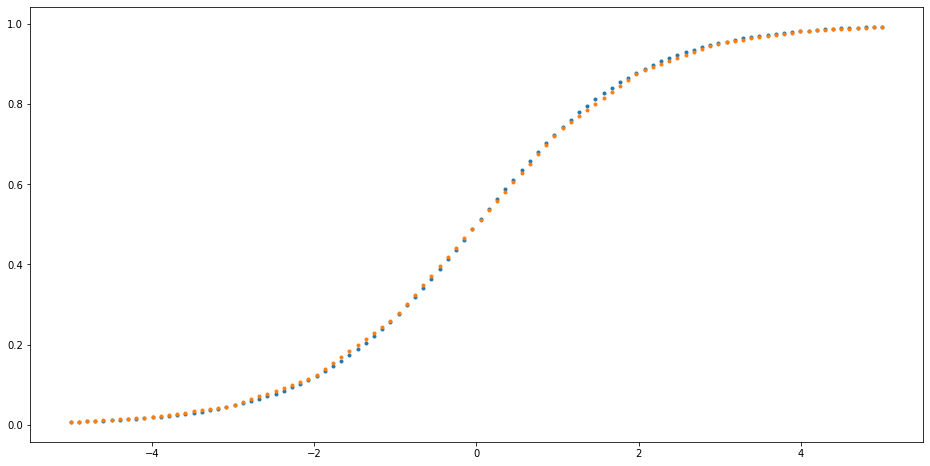

In [ ]:
x=np.linspace(-5,5,100)
y=1.0/(1.0 + np.exp(-x))
y2=activation_sigmoid_pcw(x)
plt.plot(x,y,".")
plt.plot(x,y2,".")
plt.show()